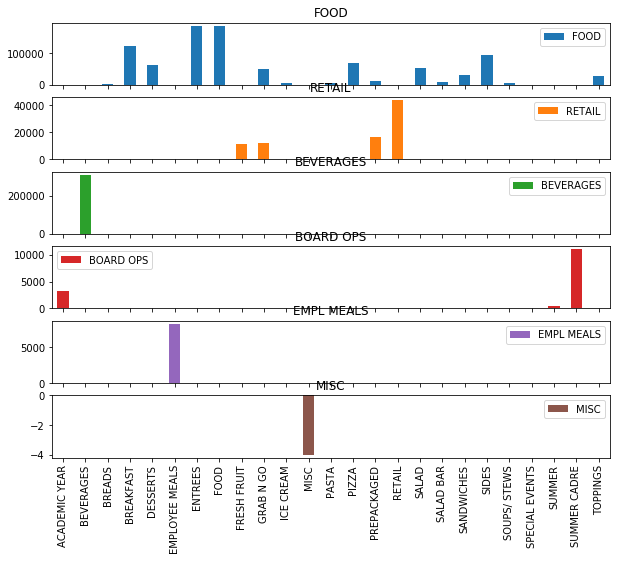

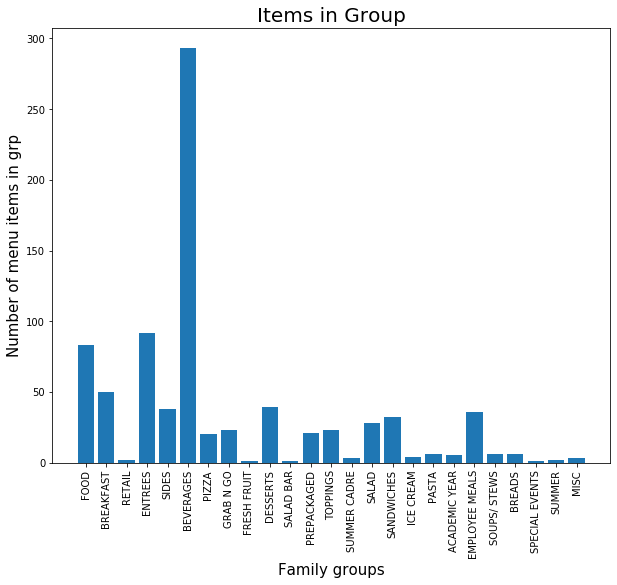

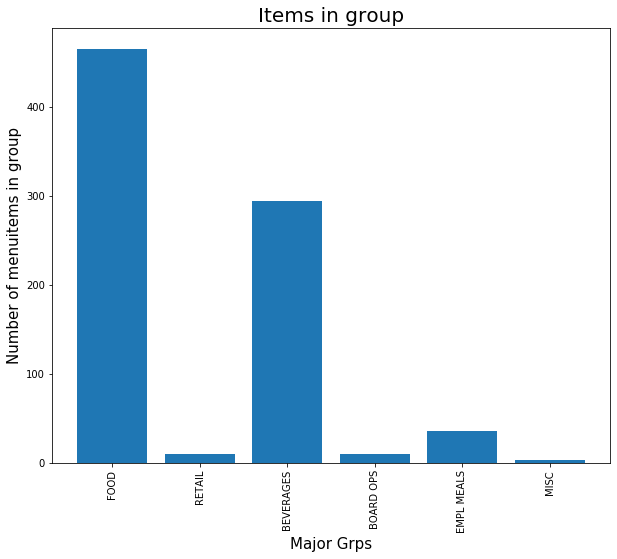

In [2]:
import numpy as np
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy 

#matplotlib figures appear inline in jupyter notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def csv_to_np_arr(train_path) :
    '''
    Read CSV into list of lists
    '''
    with open(train_path, 'r') as f:
        data = list(csv.reader(f, delimiter=','))
        #print(data[:3])
    data_np = np.array(data)
    return data_np

def unique_list(data):
    '''
    Collect all unique elements from an array and return list
    '''
    unique_items = list(set(data))
    return unique_items

def plot_dict(d, xlabel, ylabel, title):
    '''
    Plot graphs of group vs quantity sold
    '''
    plt.bar(range(len(d)), list(d.values()), align='center')
    plt.xticks(range(len(d)), list(d.keys()),rotation=90)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title, fontsize=20)
    plt.show()
    
def matching_indices(data_arr, keyword) :
    '''
    Return indices of data_arr that match keyword/phrase provided
    '''
    idx = []
    for i, x in enumerate(data_arr):
        if x == keyword:
            idx.append(i)
    return idx

def grouping(grp_data, subgroups):
    unique_groups = unique_list(grp_data)
    g = []
    for grp in unique_groups:
        idx = matching_indices(grp_data, grp)
        g.append(unique_list([subgroups[i] for i in idx]))
    return g  

def insert_dict(d, key_arr, val_arr):
    for idx, itm in enumerate(key_arr):
        if itm in d:
            val = d[itm]
            d[itm] = val + val_arr[idx]
        else:
            d[itm] = val_arr[idx]
    return d

def nested_dict(d, key_arr1, key_arr2, val_arr):
    for idx, itm in enumerate(key_arr1):
        if itm in d:
            val = d[itm]
            ####
            for idx2, itm2 in enumerate(key_arr2):
                if (itm2 in val and idx==idx2) :
                    cnt = val[itm2]
                    val[itm2] = cnt + val_arr[idx]
                elif (itm2 not in val and idx==idx2) :
                    val[itm2] = val_arr[idx]
            ####
            d[itm] = val
        else:
            val = {}
            for idx2, itm2 in enumerate(key_arr2):
                if (itm2 in val and idx==idx2) :
                    cnt = val[itm2]
                    val[itm2] = cnt + val_arr[idx]
                elif (itm2 not in val and idx==idx2) :
                    val[itm2] = val_arr[idx]
            d[itm] = val
    return d

def create_dict_and_plot(d, data, x_label, y_label, title):
    for idx, itm in enumerate(data):
        if itm in d:
            val = d[itm]
            d[itm] = val + 1
        else:
            d[itm] = 1
    plot_dict(d, x_label, y_label, title)
    return d

def main():
    train_path = 'data/f2018.csv'
    data = csv_to_np_arr(train_path)
    
    menu_items = data[1:-1, 0]
    family = data[1:-1, 1]
    major = data[1:-1, 2]
    qty_sold = data[1:-1, 3].astype(int)       #qty_sold as int datatype for plotting and processing
    
    d_mg = {}   
    d_mg = insert_dict(d_mg, major, qty_sold)
    #plot_dict(d_mg, 'Major Groups', 'Qty Sold', 'Major Groups vs Qty Sold')
    d_fg = {}   
    d_fg = insert_dict(d_fg, family, qty_sold)
    #plot_dict(d_fg, 'Family Groups', 'Qty Sold', 'Family Groups vs Qty Sold')
    
        
    #sublist = grouping(major, family)
    #print(unique_list(major))
    #print(len(sublist), len(unique_list(major)))
    #print(sublist)
    
    d = {}
    d = nested_dict(d, major, family, qty_sold)
    pd.DataFrame(d).plot(kind='bar', subplots='True')
    plt.show()
    
    fam={}
    fam = create_dict_and_plot(fam, family, 'Family groups', 'Number of menu items in grp', 'Items in Group')
    maj={}
    maj = create_dict_and_plot(maj, major, 'Major Grps', 'Number of menuitems in group', 'Items in group')
if __name__ == '__main__':
    main()